<a href="https://www.kaggle.com/code/saswattulo/multi-modal-classification-and-regression-well-exp?scriptVersionId=173284156" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

# *Multi-Output Prediction Model for Wine Type and Quality*

#### **In this Jupyter notebook, embark on an inspirational journey into the world of machine learning as we explore the creation of a multi-output prediction model for determining both the type and quality of wines.**

# 1. Introduction
### Imagine being able to predict not only the type of wine (red or white) but also its quality with remarkable accuracy. Such a feat is achievable through the power of multi-output prediction models. 
### This notebook serves as a beacon of inspiration for aspiring data scientists and enthusiasts alike, demonstrating the transformative potential of machine learning in the realm of viticulture.

# 2. Importing required packages and libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

from keras.layers import *
from keras.utils import plot_model
from keras.models import *
import keras
from keras.optimizers import Adam,RMSprop

2024-04-22 05:46:37.572018: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-04-22 05:46:37.572131: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-04-22 05:46:37.704439: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


# 3. Data loading and pre-processing

In [2]:
df=pd.read_csv('/kaggle/input/wine-quality/winequalityN.csv')

In [3]:
#data pre-processing starts here

df.dropna(axis=0,inplace=True)

encoder=LabelEncoder()
df['type']=encoder.fit_transform(df['type']).astype(float)
df

# data pre-processing ends here


,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,1.0,7.0,0.270,0.36,20.7,0.045,45.0,170.0,1.00100,3.00,0.45,8.8,6
1,1.0,6.3,0.300,0.34,1.6,0.049,14.0,132.0,0.99400,3.30,0.49,9.5,6
2,1.0,8.1,0.280,0.40,6.9,0.050,30.0,97.0,0.99510,3.26,0.44,10.1,6
3,1.0,7.2,0.230,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
4,1.0,7.2,0.230,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6491,0.0,6.8,0.620,0.08,1.9,0.068,28.0,38.0,0.99651,3.42,0.82,9.5,6
6492,0.0,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
6494,0.0,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
6495,0.0,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [4]:
# preparation of training and testing data starts here
X=df.drop(['quality','type'],axis=1)
y=df[['quality','type']]


X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

y_train_type=y_train['type']
y_train_quality=y_train['quality']

y_test_type=y_test['type']
y_test_quality=y_test['quality']

# preparation of training and testing data ends here

# 4. Multi-output model architecture building

In [5]:
# model architecture starts here
input_layer=Input(shape=(11,))

x1=Dense(64,activation='relu')(input_layer)
x2=Dense(128,activation='relu')(x1)

wine_type_layer_output=Dense(1,activation='sigmoid',name='wine_type_layer_output')(x2) # this is the output layer to detect wine type

#Here we diversificate the model adding a new Dense layer to the Base layers (x)
quality_layer=Dense(64,activation='relu')(x2)

wine_quality_layer_output=Dense(1,name='wine_quality_layer_output')(quality_layer) # this is the output layer to predict quality of wine

model=Model(inputs=input_layer,outputs=[wine_type_layer_output,wine_quality_layer_output])

#model architecture ends here

optimizer=Adam(learning_rate=0.001,weight_decay=True)
#optimizer=RMSprop(learning_rate=0.001,weight_decay=True)

model.compile(loss={'wine_type_layer_output':'binary_crossentropy','wine_quality_layer_output':'mse'},
             metrics={'wine_type_layer_output':'accuracy','wine_quality_layer_output': keras.metrics.RootMeanSquaredError()},
             optimizer=optimizer)

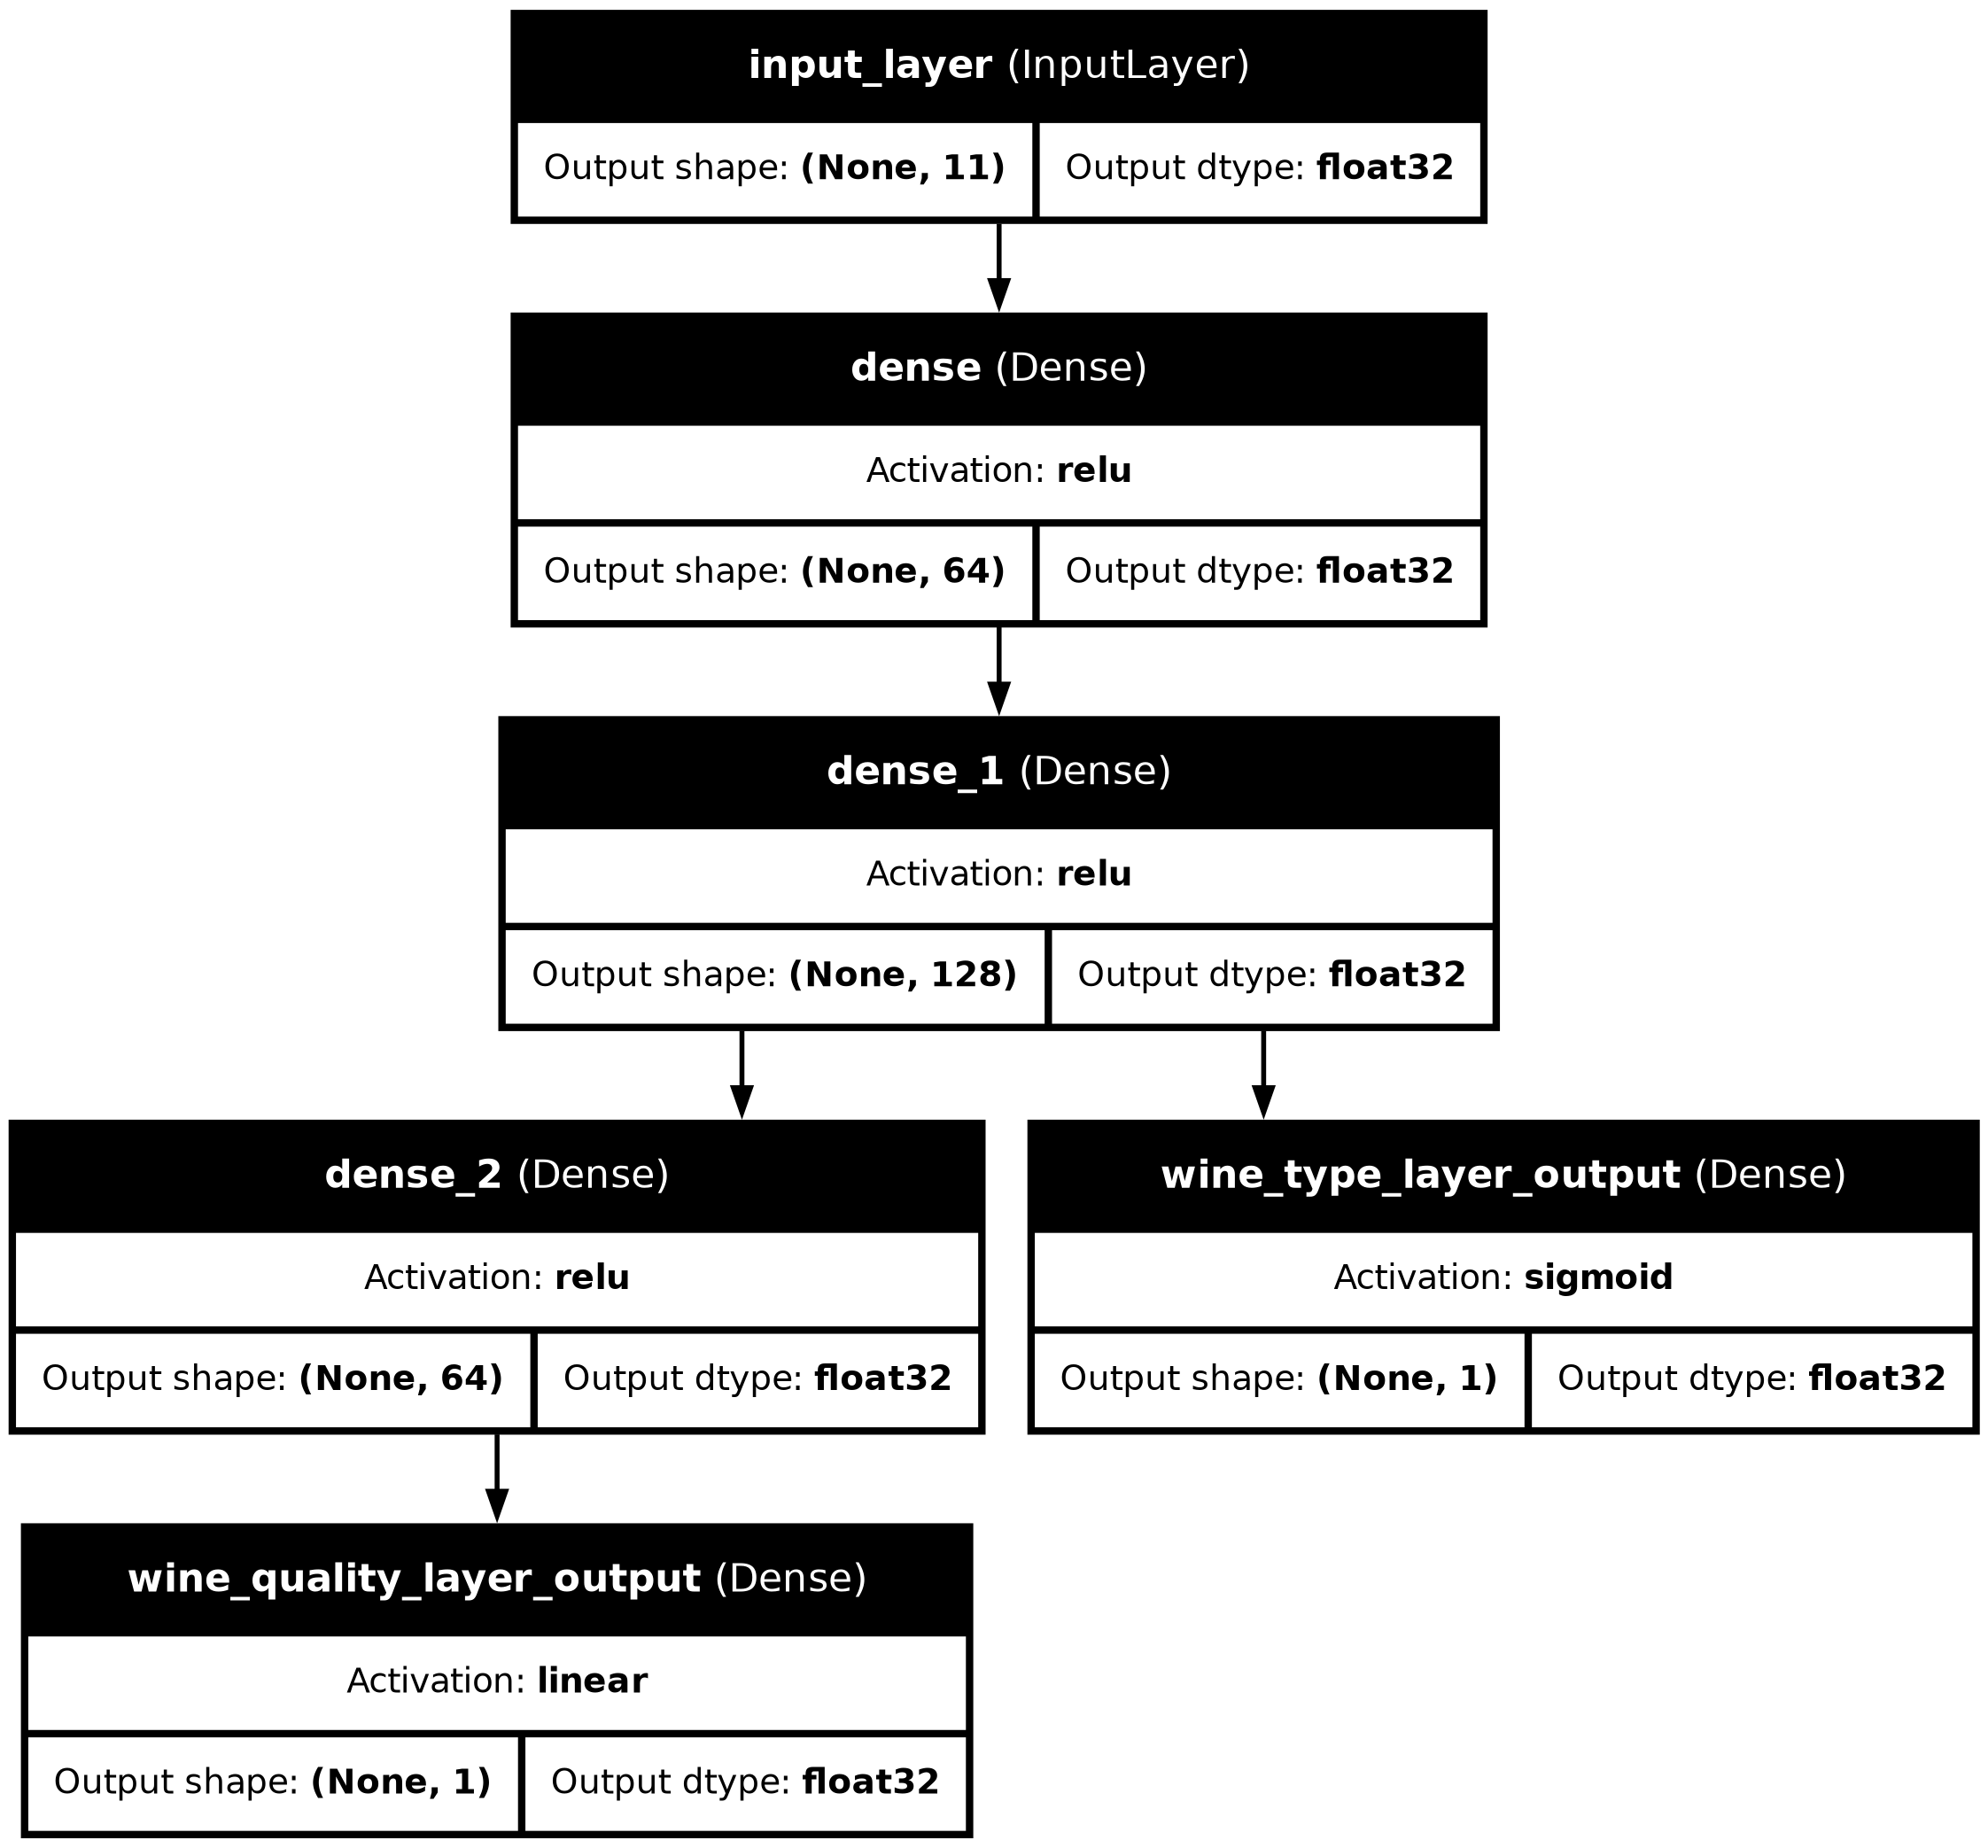

In [6]:
plot_model(model,show_dtype=True,show_layer_activations=True,show_layer_names=True,show_shapes=True)

# 5. Model Training

In [7]:
history = model.fit(X_train, [y_train_quality,y_train_type], batch_size=128, epochs=40, 
                    validation_data=(X_test, [y_test_quality,y_test_type]))

Epoch 1/40
24/41 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: -62.9851 - wine_quality_layer_output_root_mean_squared_error: 2.0695 - wine_type_layer_output_accuracy: 0.0000e+00

I0000 00:00:1713764812.994130      75 device_compiler.h:186] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.
W0000 00:00:1713764813.010194      75 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: -164.8566 - wine_quality_layer_output_root_mean_squared_error: 1.7903 - wine_type_layer_output_accuracy: 0.0000e+00

W0000 00:00:1713764814.804339      73 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


41/41 ━━━━━━━━━━━━━━━━━━━━ 6s 53ms/step - loss: -171.1130 - wine_quality_layer_output_root_mean_squared_error: 1.7785 - wine_type_layer_output_accuracy: 0.0000e+00 - val_loss: -1077.9990 - val_wine_quality_layer_output_root_mean_squared_error: 0.5053 - val_wine_type_layer_output_accuracy: 0.0000e+00
Epoch 2/40
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: -1804.9905 - wine_quality_layer_output_root_mean_squared_error: 0.8472 - wine_type_layer_output_accuracy: 0.0000e+00 - val_loss: -5215.9170 - val_wine_quality_layer_output_root_mean_squared_error: 2.0149 - val_wine_type_layer_output_accuracy: 0.0000e+00
Epoch 3/40
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: -7754.1030 - wine_quality_layer_output_root_mean_squared_error: 2.8498 - wine_type_layer_output_accuracy: 0.0000e+00 - val_loss: -17546.7559 - val_wine_quality_layer_output_root_mean_squared_error: 0.8688 - val_wine_type_layer_output_accuracy: 0.0000e+00
Epoch 4/40
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: -23082.8203 - wi

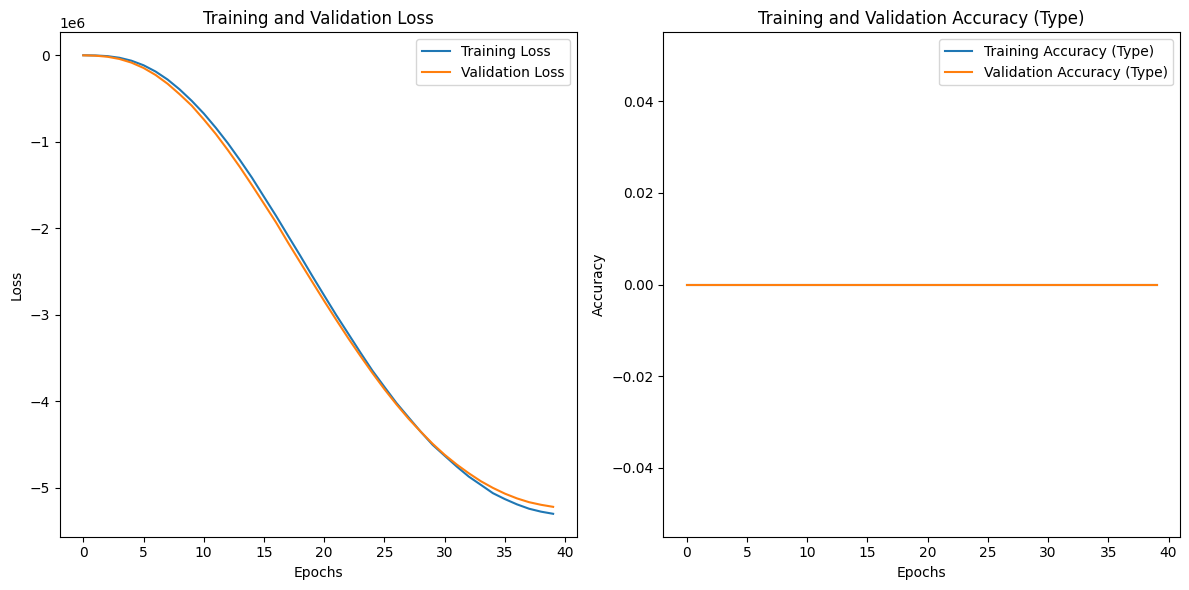

In [8]:
# Plot training and validation loss
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# Plot training and validation accuracy for type prediction
plt.subplot(1, 2, 2)
plt.plot(history.history['wine_type_layer_output_accuracy'], label='Training Accuracy (Type)')
plt.plot(history.history['val_wine_type_layer_output_accuracy'], label='Validation Accuracy (Type)')
plt.title('Training and Validation Accuracy (Type)')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()

# 6. Conclusion: A Toast to Innovation and Collaboration 🥂

#### As we come to the end of this exhilarating journey through the realm of multi-output prediction models for wine, I extend my heartfelt gratitude to you, dear reader, for joining me on this exploration. Your curiosity and enthusiasm have fueled our quest for knowledge and discovery.

#### Before we part ways, I'd like to extend a humble request. If you found this notebook insightful and valuable, I invite you to consider upvoting it and leaving a comment to share your thoughts and insights. Your feedback is immensely valuable and encourages further collaboration and exploration within our vibrant community.

#### Furthermore, I encourage you to take an active role in shaping the future of this project. Feel empowered to fork this notebook, experiment with the code, and introduce your own innovations. Together, we can co-create a repository of knowledge that transcends boundaries and fosters continuous learning and growth.

#### Lastly, I invite you to explore my other works and contributions within the data science community. From insightful analyses to innovative projects, there's always something new to discover and learn from. Your continued engagement and support inspire me to push the boundaries of what's possible in the exciting world of data science.

#### Thank you once again for your visit, your engagement, and your invaluable contributions. Here's to the spirit of innovation, collaboration, and endless exploration. Until we meet again on our next adventure!

## **Note**: Keep the spirit of collaboration alive by sharing your insights, engaging with the community, and exploring the diverse array of projects and ideas that await you. Together, we can create a brighter future fueled by knowledge, curiosity, and passion.🚀